<a href="https://colab.research.google.com/github/AtharBagunaid/Face-mask-detector/blob/main/Submit_Face_mask_detector_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
test_path = "/content/drive/MyDrive/Colab Notebooks/DIP/Mask_detection/test"

In [ ]:
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes = ['with_mask', 'without_mask'], batch_size = 200, class_mode = 'categorical')

Found 2234 images belonging to 2 classes.


In [ ]:
test_images, test_labels = next(test_batches)
test_labels

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [ ]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.], dtype=float32)

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

# Freeze the layers 
for layer in model.layers:
    layer.trainable = False

# Add 'softmax' instead of earlier 'prediction' layer.
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/faceMask_detection.h5')

In [ ]:
predictions = model.predict(test_batches, steps = 1, verbose = 0)
predictions

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


array([[9.75093644e-06, 9.99990225e-01],
       [9.97600853e-01, 2.39921059e-03],
       [5.09167206e-04, 9.99490857e-01],
       [3.67417088e-05, 9.99963284e-01],
       [2.51101330e-03, 9.97488976e-01],
       [9.98336911e-01, 1.66310463e-03],
       [1.83063343e-01, 8.16936672e-01],
       [8.70232940e-01, 1.29767016e-01],
       [9.99562919e-01, 4.37036826e-04],
       [2.49629910e-03, 9.97503698e-01],
       [6.27686560e-01, 3.72313470e-01],
       [1.19187127e-04, 9.99880791e-01],
       [5.42107155e-04, 9.99457896e-01],
       [9.88487005e-01, 1.15130097e-02],
       [3.36719811e-01, 6.63280189e-01],
       [2.22544628e-03, 9.97774541e-01],
       [9.99960065e-01, 3.99203709e-05],
       [1.04541872e-02, 9.89545763e-01],
       [2.40863461e-04, 9.99759138e-01],
       [1.85251395e-06, 9.99998093e-01],
       [2.92585883e-05, 9.99970794e-01],
       [9.97244716e-01, 2.75533507e-03],
       [9.99766529e-01, 2.33418308e-04],
       [4.71259385e-01, 5.28740644e-01],
       [9.240207

In [ ]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'confusion matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied be setting 'Normalize = True'
  """
  plt.imshow(cm, interpolation= 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1) [:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')
  
  print(cm)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], 
                   horizontalalignment = 'center',
                   color = 'white' if cm [i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion matrix, without normalization
[[99  3]
 [11 87]]


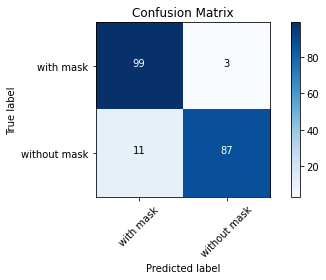

In [ ]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))
cm_plot_labels = ['with mask', 'without mask']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')